# 讲关于python设计，建筑的一切

## 异常处理
---
异常在Python中通常被定义为一个类，所有异常的共同特点是他们都继承于一个BaseException的内置类。

In [1]:
BaseException

BaseException

In [8]:
class EvenOnly(list):
    def append(self, integer: int) -> None:
        if not isinstance(integer, int):
            raise TypeError("Only integers can be added")
        if integer % 2:
            raise ValueError("Only even numbers can be added")
        super().append(integer)

In [9]:
tem = EvenOnly()

In [10]:
tem

[]

首先看看如果输入的类型不对会怎么样

In [11]:
tem.append("4.0")

TypeError: Only integers can be added

In [13]:
# 是这写一个完整的带异常检测的函数
def _division(anumber):
    try:
        if anumber == 13:
            raise ValueError("13 is an unlucky number")
        return 100 / anumber
    except ZeroDivisionError:
        return "Please enter a number other than zero"
    except TypeError:
        return "Please enter a numerical value"
    except ValueError:
        print("No, No, not 13!")
        raise 

In [14]:
_division(13)

No, No, not 13!


ValueError: 13 is an unlucky number

In [15]:
_division(0)

'Please enter a number other than zero'

## property与Python面对对象


In [16]:
class Color:
    def __init__(self, rgb_value, name):
        self.rgb_value = rgb_value
        # _name是私有属性
        self._name = name
        
    def _set_name(self, name):
        if not name:
            raise Exception("Invalid Name")
        print("Note! The name has changed!")
        self._name = name
        
    def _get_name(self):
        return self._name

    name = property(_get_name, _set_name)

In [17]:
c = Color("#0000ff", "bright red")

In [18]:
print(c.name)

bright red


In [19]:
c.name = "red"

Note! The name has changed!


In [20]:
c._get_name()

'red'

在上面这个例子中，name这个属性是通过property方法标注的，那么究竟property的机理是什么呢？

首先，上面代码为name的命名提供了一个入口：_set_name方法

如果直接通过".name = "方法来进行重新命名，必须得通过_set_name方法。也就是我们提供了一个显示命名的内容管理机制。

那么， **property是如何运作的呢？**
property可以接受几个参数并返回一个对象，这个对象会作为class的property，第一，二个参数用的最多，其中get，set方法的设置就如刚刚所使用的那样。

**使用property装饰器**是常见的操作


## Python协程与异步IO模型

IO密集型任务，通过线程调度来让线程在执行IO时让出GIL，实现**表面并发。**

但实际上，除了多线程还有一种选择就是协程，其名为Coroutine，为**单线程的并发。** 其优势为省去多线程之间的切换开销，Python中的异步IO模块asyncio是基本的协程模块。

Python协程的发展历程：

* 最初的yield和send()语法
* Python3.4中加入了asyncio模块
* @asyncio.coroutine装饰器和yield from语法
* Python3.5中提供了async/await语法
* Python3.6中asynico由临时版改为了稳定版

多进程 + 协程模型，重发利用多核处理器，充分发挥协程的高效率，可获得极高的性能。

多进程和多线程体现的是操作系统的能力，而协程体现的是程序员的流程控制能力。

In [1]:
import time

def task1():
    while True:
        yield "<甲>也累了， 让<乙>工作一会儿"
        time.sleep(1)
        print("<甲>工作了一段时间......")
        

def task2(t):
    next(t)
    while True:
        print("- - - - - ")
        print("<乙>工作了一段时间......")
        time.sleep(2)
        print("<乙>累了，让<甲>工作一会儿....")
        ret = t.send(None)
        print(ret)
    t.close()
    
if __name__ == '__main__':
    t = task1()
    task2(t)

- - - - - 
<乙>工作了一段时间......
<乙>累了，让<甲>工作一会儿....
<甲>工作了一段时间......
<甲>也累了， 让<乙>工作一会儿
- - - - - 
<乙>工作了一段时间......
<乙>累了，让<甲>工作一会儿....
<甲>工作了一段时间......
<甲>也累了， 让<乙>工作一会儿
- - - - - 
<乙>工作了一段时间......
<乙>累了，让<甲>工作一会儿....
<甲>工作了一段时间......
<甲>也累了， 让<乙>工作一会儿
- - - - - 
<乙>工作了一段时间......
<乙>累了，让<甲>工作一会儿....
<甲>工作了一段时间......
<甲>也累了， 让<乙>工作一会儿
- - - - - 
<乙>工作了一段时间......
<乙>累了，让<甲>工作一会儿....
<甲>工作了一段时间......
<甲>也累了， 让<乙>工作一会儿
- - - - - 
<乙>工作了一段时间......
<乙>累了，让<甲>工作一会儿....
<甲>工作了一段时间......
<甲>也累了， 让<乙>工作一会儿
- - - - - 
<乙>工作了一段时间......
<乙>累了，让<甲>工作一会儿....
<甲>工作了一段时间......
<甲>也累了， 让<乙>工作一会儿
- - - - - 
<乙>工作了一段时间......


KeyboardInterrupt: 

In [2]:
next(t)

<甲>工作了一段时间......


'<甲>也累了， 让<乙>工作一会儿'

In [3]:
tem = t.send(None)
print(tem)

<甲>工作了一段时间......
<甲>也累了， 让<乙>工作一会儿


In [4]:
tem = t.send(None)

<甲>工作了一段时间......


In [6]:
def simple_coroutine():
    print('-> 启动协程')
    y = 10
    x = yield y
    print('-> 协程接收到了x的值:', x)

my_coro = simple_coroutine()
ret = next(my_coro)
print(ret)
my_coro.send(None)

-> 启动协程
10
-> 协程接收到了x的值: None


StopIteration: 

In [8]:
import time

def consumer():
    r = ''
    while True:
        n = yield r
        if not n:
            return
        print('[CONSUMER] Consuming %s...' % n)
        time.sleep(1)
        r = '200 OK'

def produce(c):
    next(c)
    n = 0
    while n < 5:
        n = n + 1
        print('[PRODUCER] Producing %s...' % n)
        r = c.send(n)
        print('[PRODUCER] Consumer return: %s' % r)
    c.close()

if __name__=='__main__':
    c = consumer()
    produce(c)

[PRODUCER] Producing 1...
[CONSUMER] Consuming 1...
[PRODUCER] Consumer return: 200 OK
[PRODUCER] Producing 2...
[CONSUMER] Consuming 2...
[PRODUCER] Consumer return: 200 OK
[PRODUCER] Producing 3...
[CONSUMER] Consuming 3...
[PRODUCER] Consumer return: 200 OK
[PRODUCER] Producing 4...
[CONSUMER] Consuming 4...
[PRODUCER] Consumer return: 200 OK
[PRODUCER] Producing 5...
[CONSUMER] Consuming 5...
[PRODUCER] Consumer return: 200 OK


@asyncio.coroutine: asyncio模块的装饰器，用于将生成器声明为协程。



In [13]:
import asyncio
import datetime

@asyncio.coroutine  # 声明一个协程
def display_date(num, loop):
    end_time = loop.time() + 10.0
    while True:
        print("Loop: {} Time: {}".format(num, datetime.datetime.now()))
        if (loop.time() + 1.0) >= end_time:
            break
        yield from asyncio.sleep(2)  # 阻塞直到协程sleep(2)返回结果
loop = asyncio.get_event_loop()  # 获取一个event_loop
tasks = [display_date(1, loop), display_date(2, loop)]
loop.run_until_complete(asyncio.gather(*tasks))  # "阻塞"直到所有的tasks完成
# loop.close()

RuntimeError: This event loop is already running

Loop: 1 Time: 2021-01-13 16:00:47.140307
Loop: 2 Time: 2021-01-13 16:00:47.140307
Loop: 2 Time: 2021-01-13 16:00:49.146899
Loop: 1 Time: 2021-01-13 16:00:49.147904
Loop: 2 Time: 2021-01-13 16:00:51.148577
Loop: 1 Time: 2021-01-13 16:00:51.148577
Loop: 2 Time: 2021-01-13 16:00:53.148659
Loop: 1 Time: 2021-01-13 16:00:53.148659
Loop: 2 Time: 2021-01-13 16:00:55.148906
Loop: 1 Time: 2021-01-13 16:00:55.155493
Loop: 2 Time: 2021-01-13 16:00:57.156340
Loop: 1 Time: 2021-01-13 16:00:57.156340


In [41]:
# 实现IO密集型任务的好办法：线程池 - ThreadPool（降低启动新线程的开销）
# 假设我们现在想要并行地运行两个操作，其一是fetch_url

def fetch_url(url):
    import urllib.request
    response = urllib.request.urlopen(url)
    return response.read()

# 第二个操作是等待一个 操作执行完毕，不断循环

def wait_until(predicate):
    import time
    seconds = 0
    while not predicate():
        print('Waiting...')
        time.sleep(1.0)
        seconds += 1
    print('Done!')
    return seconds

from multiprocessing.pool import ThreadPool
pool = ThreadPool(4)
t1 = pool.apply_async(fetch_url, args=('https://httpbin.org/delay/3', ))
t2 = pool.apply_async(wait_until, args=(t1.ready, ))
pool.close()
pool.join()

Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Done!


In [12]:
# 多线程对IO密集型任务比较友好


Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Done!


In [13]:
pool.join()

In [54]:
urls = [
    'https://httpbin.org/delay/1',
    'https://httpbin.org/delay/2',
    'https://httpbin.org/delay/3',
    'https://httpbin.org/delay/4'
] 

pool = ThreadPool()

In [59]:
def fetch_all_urls_theradeed():
    return pool.map(fetch_url,urls)


timeit.timeit(fetch_all_urls_theradeed, number=1)

5.724327700008871

In [58]:
def fetch_all_urls():
    contents = []
    for url in urls:
        contents.append(fetch_url(url))
    return contents
    
timeit.timeit(fetch_all_urls, number=1)

16.407700900002965

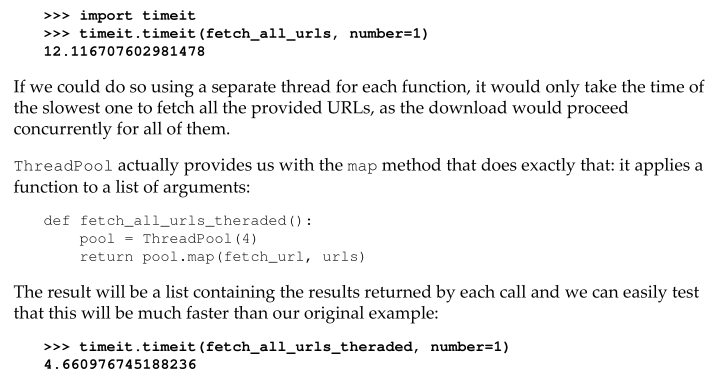

理解异步里的几个概念十分关键：
* 异步IO
* selector(select, poll, epoll)
* event loop

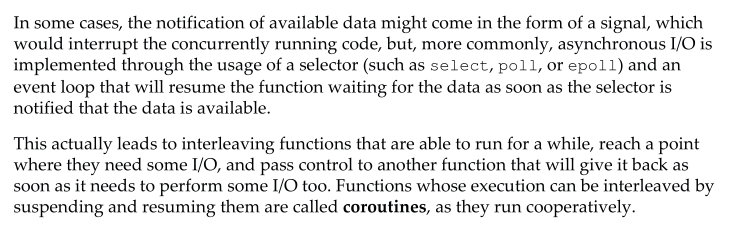

In [61]:
# 为了能让人确切地看到什么是协程，选择：
import asyncio

# 一个倒计时函数，同时能够log出东西来保证异步的过程被观察到
async def countdown(identifier, n):
    while n > 0:
        print('left:', n, '({})'.format(identifier))
        await asyncio.sleep(1)
        n -= 1
        
async def main():
    await asyncio.wait([
        countdown("A", 2),
        countdown("B", 3)
    ])

loop = asyncio.get_event_loop()
loop.run_until_complete(main())

执行上面两行代码，由于jupyter kernel的自动执行异步的机制：
https://ipython.readthedocs.io/en/stable/interactive/autoawait.html#using-autoawait-in-a-notebook-ipykernel

所以选择在terminal下执行，以下是执行结果:
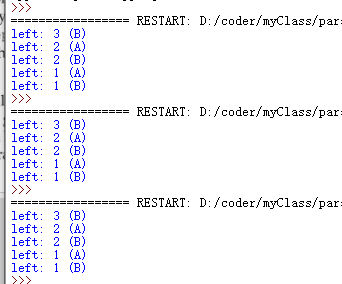

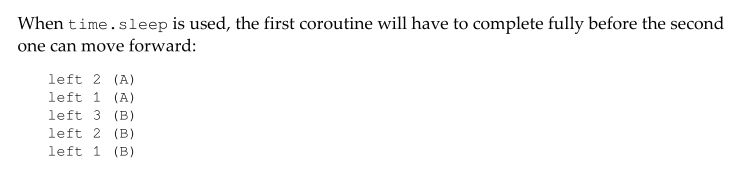
所以简单的原则就是，当你要调用一个会有阻塞的call的时候，你可以将其声明为一个协程。

下面给出一个协程版本的fetch_lab

In [63]:
async def wait_until(predicate):
    import time
    seconds = 0
    while not predicate():
        print('Waiting...')
        await asyncio.sleep(1)
        seconds += 1
    print('Done!')
    return seconds

# fetch_url部分不能直接使用urllib，因为这会导致当前线程一直阻塞，因此我们只能使用asyncio.
# open_connection,这是一个纯TCP层的实现，因此需要我们自己实现http
import urllib
async def fetch_url(url):
    url = urllib.parse.urlsplit(url)
    reader, writer = await asyncio.open_connection(url.hostname, 80)
    req = ('GET {path} HTTP/1.0\r\n'
          'Host: {hostname}\r\n'
          '\r\n').format(path=url.path or '/', hostname = url.hostname)
    writer.write(req.encode('latin-1'))
    while True:
        lint = await reader.readline()
        if not line.strip():
            break
    return await reader.read()

"""
loop = asyncio.get_event_loop()
t1 = asyncio.ensure_future(fetch_url('http://httpbin.org/delay/3'))
t2 = asyncio.ensure_future(wait_until(t1.done))
loop.run_until_complete(t2)
"""



"\nloop = asyncio.get_event_loop()\nt1 = asyncio.ensure_future(fetch_url('http://httpbin.org/delay/3'))\nt2 = asyncio.ensure_future(wait_until(t1.done))\nloop.run_until_complete(t2)\n"

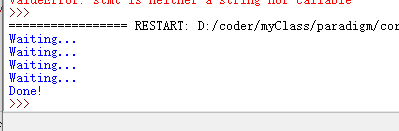

In [ ]:
import os

def fib(n, seen):
    if n not in seen and n % 5 == 0:
        print(os.getpgid(), '->', n)
        seen.add(n)
        
    if n < 2:
        return n
    return fib(n-2, seen) + fib(n-1, seen)

from multiprocessing import Pool
pool = Pool()
t1 = pool.apply_async(fib, args = (20, set()))
t2 = pool.apply_async(fib, args = (22, set()))
pool.close()
pool.join()


In [1]:
import os

print(os.cpu_count())

4


多进程有一点非常重要，首先由于进程之间无法共享内存，所以**multiprocessing.SimpleQueue**这个对象（实际上是一个**pipe**对象）专门用来做进程间的通信。而由于pipe只能读和写字节，所以我们传给pool以及pool中进程执行的结果都会通过**pickle**这个组件转化为字节。

t1 = pool.apply_async(fib, args = (20, set()))

这一句是我们提交给Pool的请求，fib函数，20还有空集合通通都被序列化并发送给了Pool当中的一个worker。

另一方面，pool.join导致：在pool中的所有进程执行完毕之前，主进程会阻塞。

理论上来说，pool的进程永远不会结束，这是因为他一直在找进程队列（queue）中可以执行的任务。在执行*join*前，我们执行*close*，这一步是告诉pool：如果进程完成了他们需要完成的任务，就关闭Pool。

multiprocessing.Pool返回给t1,t2的是AsyncResult对象，我们可以通过诸如t1,get()的方法来获得进程的返回至。

